In [79]:
import unicodecsv

In [80]:

def read_csv(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)


enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [81]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [82]:
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [83]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [84]:
import datetime

def parse_maybe_int(data):
    if data == '':
        return None
    return int(float(data))

def parse_boolean(data):
    if data == '':
        return None
    if data == 'True':
        return True
    else:
        return False
    
def parse_Datetime(data):
    if data == '':
        return None
    else:
        return datetime.datetime.strptime(data, "%Y-%m-%d")
    
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_Datetime(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = parse_boolean(enrollment['is_canceled'])
    enrollment['is_udacity'] = parse_boolean(enrollment['is_udacity'])
    enrollment['join_date'] = parse_Datetime(enrollment['join_date'])
    
for engagement in daily_engagement:
    engagement['lessons_completed'] = parse_maybe_int(engagement['lessons_completed'])
    engagement['num_courses_visited'] = parse_maybe_int(engagement['num_courses_visited'])
    engagement['projects_completed'] = parse_maybe_int(engagement['projects_completed'])
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    engagement['utc_date'] = parse_Datetime(engagement['utc_date'])
    
for submission in project_submissions:
    submission['completion_date'] = parse_Datetime(submission['completion_date'])
    submission['creation_date'] = parse_Datetime(submission['creation_date'])
    

In [85]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']
    


In [86]:
def get_unique_students(data):
    unique_students = set()
    for record in data:
        unique_students.add(record['account_key'])
    return unique_students

In [87]:
unique_enrollments_students = get_unique_students(enrollments)
unique_engagement_students =  get_unique_students(daily_engagement)
unique_submissions_students = get_unique_students(project_submissions)


In [88]:
print('unique enrollments students: %d' %(len(unique_enrollments_students)))
print('unique engagement students: %d' %(len(unique_engagement_students)))
print('unique submissions students: %d' %(len(unique_submissions_students)))

unique enrollments students: 1302
unique engagement students: 1237
unique submissions students: 743


In [89]:
num_problem_student = 0;
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']):
        print(enrollment)
        num_problem_student += 1

print(num_problem_student)

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


In [90]:
udacity_test_accout = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accout.add(enrollment['account_key'])
len(udacity_test_accout)

6

In [91]:
def remove_udacity_account(data):
    non_udacity_account = []
    for record in data:
        if record['account_key'] not in udacity_test_accout:
            non_udacity_account.append(record)
    return non_udacity_account



In [92]:
non_udacity_enrollments = remove_udacity_account(enrollments)
non_udacity_daily_engagement = remove_udacity_account(daily_engagement)
non_udacity_project_submissions = remove_udacity_account(project_submissions)

In [93]:
print(len(non_udacity_enrollments))
print(len(non_udacity_daily_engagement))
print(len(non_udacity_project_submissions))

1622
135656
3634


In [94]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

In [95]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0 

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data



In [96]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_daily_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_project_submissions)

print(len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

1293
134549
3618


In [97]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

In [98]:
paid_engagement_in_first_week[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [99]:
from collections import defaultdict

def group_data(data, keyname):
    data_groupby_keyname = defaultdict(list)
    for d in data:
        key = d[keyname]
        data_groupby_keyname[key].append(d)
    return data_groupby_keyname

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')


In [100]:

def sum_grouped_items(data, fieldname):
    summed_data = {}
    for key, data_points in data.items():
        total = 0
        for data_point in data_points:
            if fieldname == 'num_courses_visited':
                #print 'it is num_courses_visited'
                if data_point[fieldname] > 0:
                    total += 1
            else:
                total += data_point[fieldname]
                #print 'it is not num_course_visited'
        summed_data[key]=total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited') 

('Mean:', 306.70832675342825)
('std:', 412.99693340852957)
('min:', 0.0)
('max:', 3564.7332644989997)


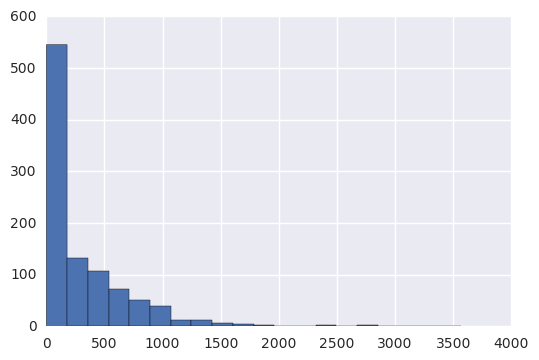

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def describe_data(data):
    print('Mean:', np.mean(data))
    print('std:', np.std(data))
    print('min:', np.min(data))
    print('max:', np.max(data))
    plt.hist(data,bins=20)
describe_data(list(total_minutes_by_account.values()))

In [102]:
total_lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(total_lessons_completed_by_account.values())

('Mean:', 1.636180904522613)
('std:', 3.0025612998294227)
('min:', 0)
('max:', 36)


In [103]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'num_courses_visited')
describe_data(days_visited_by_account.values())
print days_visited_by_account['0']


('Mean:', 2.8673366834170855)
('std:', 2.2551980029196814)
('min:', 0)
('max:', 7)
7


In [104]:
student_with_max_minutes = max(total_minutes_by_account.items(), key=lambda pair: pair[1])
s = None   
for d in paid_engagement_in_first_week:
    if d['account_key'] == student_with_max_minutes[0]:
        print(d)
        s=d
    

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

In [105]:
paid_students['163']

datetime.datetime(2015, 7, 9, 0, 0)

In [106]:
within_one_week(paid_students['108'], s['utc_date'])

False

In [107]:
paid_submissions[9]

{u'account_key': u'381',
 u'assigned_rating': u'INCOMPLETE',
 u'completion_date': datetime.datetime(2015, 7, 29, 0, 0),
 u'creation_date': datetime.datetime(2015, 7, 29, 0, 0),
 u'lesson_key': u'3165188753',
 u'processing_state': u'EVALUATED'}

In [108]:
subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if (project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
len(pass_subway_project)



647

In [109]:
paid_engagement_in_first_week[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [116]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


In [117]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')


passing minutes_spent
('Mean:', 394.58604648350865)
('std:', 448.4995193265521)
('min:', 0.0)
('max:', 3564.7332644989997)
no passing minutes_spent
('Mean:', 143.32647426675584)
('std:', 269.53861901149509)
('min:', 0.0)
('max:', 1768.5227493319999)


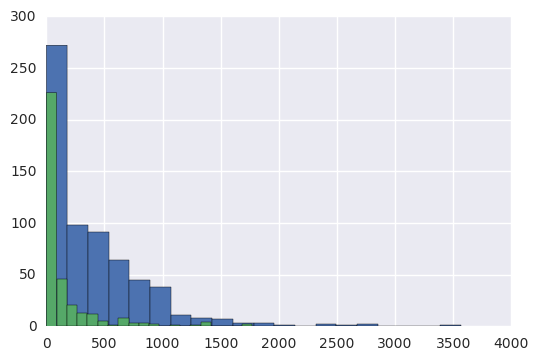

In [136]:
passing_engagement_minutes_spent_by_account = sum_grouped_items(passing_engagement_by_account, \
                                                                   'total_minutes_visited')
non_passing_engagement_minutes_spent_by_account = sum_grouped_items(non_passing_engagement_by_account, \
                                                                   'total_minutes_visited')
print('passing minutes_spent')
describe_data(passing_engagement_minutes_spent_by_account.values())

print('no passing minutes_spent')
describe_data(non_passing_engagement_minutes_spent_by_account.values())



passing lesson_completed
('Mean:', 2.0525502318392581)
('std:', 3.1422270555779344)
('min:', 0)
('max:', 36)
no passing lesson_completed
('Mean:', 0.86206896551724133)
('std:', 2.5491599418312028)
('min:', 0)
('max:', 27)


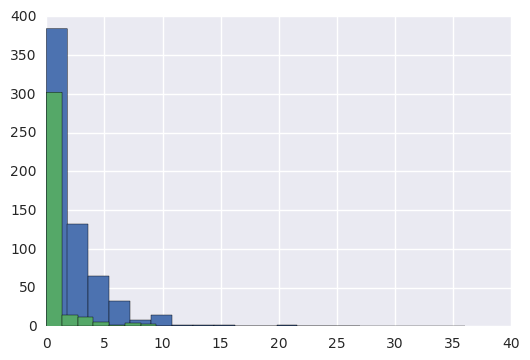

In [137]:
passing_engagement_lesson_completed_by_account = sum_grouped_items(passing_engagement_by_account, \
                                                                   'lessons_completed')
non_passing_engagement_lesson_completed_by_account = sum_grouped_items(non_passing_engagement_by_account, \
                                                                   'lessons_completed')
print('passing lesson_completed')
describe_data(passing_engagement_lesson_completed_by_account.values())
print('no passing lesson_completed')
describe_data(non_passing_engagement_lesson_completed_by_account.values())

passing days_visit
('Mean:', 3.3848531684698608)
('std:', 2.2588214709184595)
('min:', 0)
('max:', 7)
no passing days_visit
('Mean:', 1.9051724137931034)
('std:', 1.9057314413619049)
('min:', 0)
('max:', 7)


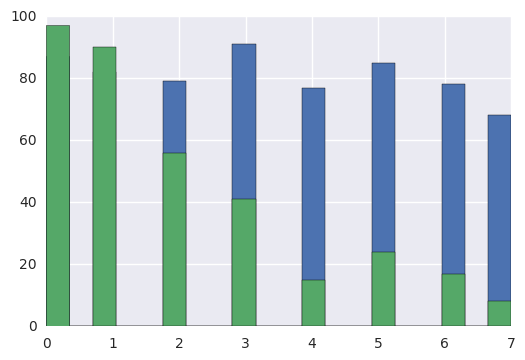

In [138]:
passing_engagement_days_visit_by_account = sum_grouped_items(passing_engagement_by_account, \
                                                                   'num_courses_visited')
non_passing_engagement_days_visit_by_account = sum_grouped_items(non_passing_engagement_by_account, \
                                                                   'num_courses_visited')
print('passing days_visit')
describe_data(passing_engagement_days_visit_by_account.values())
print('no passing days_visit')
describe_data(non_passing_engagement_days_visit_by_account.values())